Perceptron - modelo linear para classificação binária


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

In [4]:
# Visualizacao 3 primeiros
X_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
# Selecao das duas colunas de petala e targets (valor que queremos prever) igual a 0 e 1
X = X_iris.loc[y_iris.isin([0,1]),['petal length (cm)','petal width (cm)']]
y = y_iris.loc[y_iris.isin([0,1])]

In [6]:
y.value_counts()

target
0    50
1    50
Name: count, dtype: int64

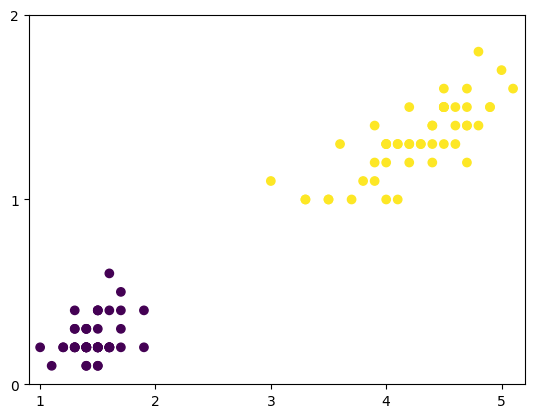

In [7]:
fig,ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(xlim=(0.9, 5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()

Classe linearmente separaveis, uma linha separa as duas classes no grafico

eixo x - petal_length
eixo y = petal_width

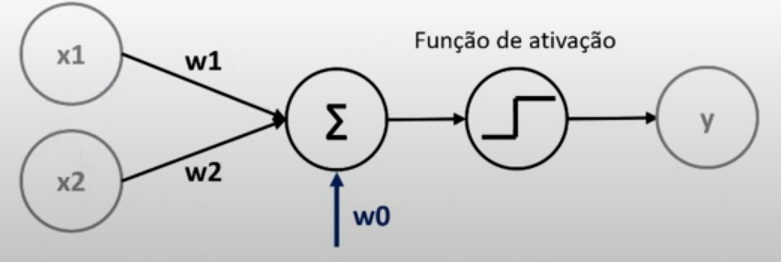

In [21]:
# Separando database em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import Perceptron

In [11]:
# Criacao do classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

In [ ]:
# Verificar os pesos
clf.coef_

array([[0.08, 0.08]])

In [ ]:
# Verificando o vies
clf.intercept_

array([-0.2])

In [20]:
w1 = round(clf.coef_[0][0], 2)
w2 = round(clf.coef_[0][1], 2)
w0 = clf.intercept_[0]
print(w1,w2,w0)

0.08 0.08 -0.2


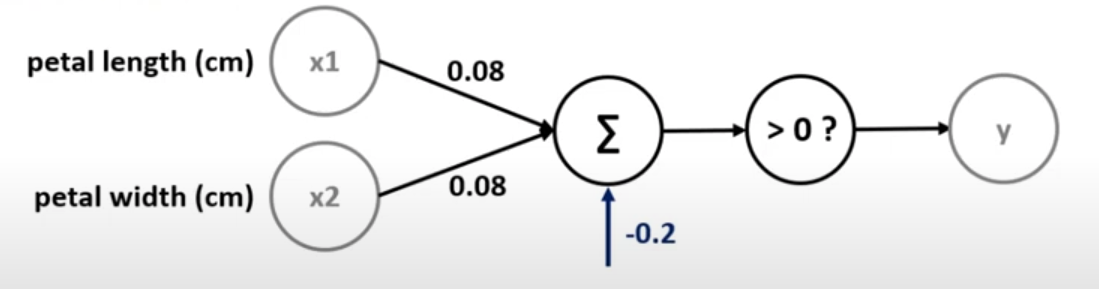

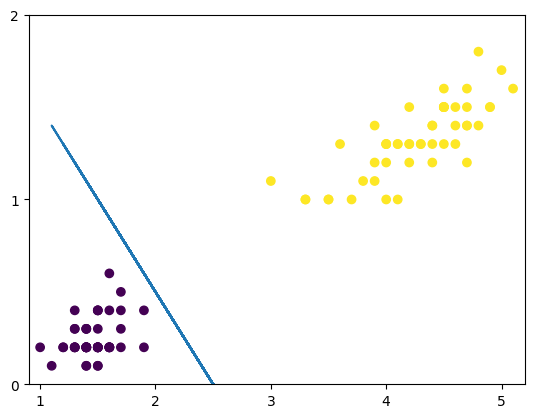

In [23]:
# Visualizacao grafica da reta gerada pelo Perceptron da classifiicacao linear

fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1*X_train.iloc[:,0]-w0)/w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(xlim=(0.9, 5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()